# This notebook is an example Template for how to use the evaluation

Supported metrics:

- Semantic Similarity via Sentence Transformers, Model is configurable
- Rouge Scores
- Meteor
- Precision
- Recall
- F1
- Grammatic Errors and possible typos, as well as styling warning and errors via LanguageTool

For more details regarding the metrics see Teams. All metrics are implemented using an abstract base class, which enables easy extendibility if additional metrics are required. All Evaluators export .csv files of their results by default. Every class and method includes Python docstring documentations and is covered with Unittests. The classes use the same data exchange format / Interface as our pipeline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.evaluation.eval_main import Metrics

In [3]:
# Example outputs
model_results = [
        (1, ["What are the most common security goals referred to in the CIA Triad?"]),
        (2, ["Q: What security measure can protect sensitive information from eavesdropping during communication?"])
    ]

references = [
    (1, ["What are the security goals of CIA Triad and what does it stand for?"]),
    (2, ["What is confidentiality?"])
]

In [17]:
metrics = Metrics(save_to_file=False)

result = pd.DataFrame(
    metrics.evaluate(model_output=model_results, references=references),
    index=["ChatGPT"]
)
result

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/I516998/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rouge1_fmeasure,rouge1_precision,rouge1_recall,rouge2_fmeasure,rouge2_precision,rouge2_recall,rougeL_fmeasure,rougeL_precision,rougeL_recall,rougeLsum_fmeasure,...,min_r,avg_f1,max_f1,min_f1,avg_cos_sim,max_cos_sim,min_cos_sim,avg_sem_meteor,max_sem_meteor,min_sem_meteor
ChatGPT,0.325926,0.310897,0.416667,0.16,0.166667,0.153846,0.325926,0.310897,0.416667,0.325926,...,0.0,0.363636,0.727273,0.0,0.715747,0.912091,0.519403,0.311829,0.423658,0.2


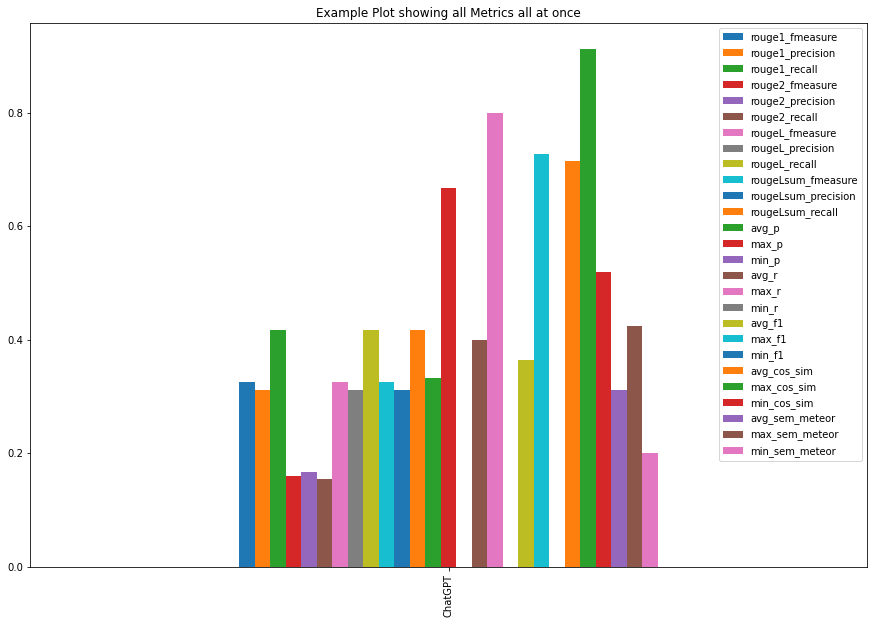

In [18]:
result.plot(kind="bar", figsize=(15,10), title="Example Plot showing all Metrics all at once") # Just for demo purposes. Would not recommend!
plt.show()